In [114]:
# Library for Visulaization
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# Pandas library for data load and data slicing
import pandas as pd
df = pd.read_csv("ds_churn_test_data.csv")

In [116]:
# Data Dimesion
df.shape

(10000, 13)

In [117]:
# Data Snippet
df.head()

,USER_TYPE,MEMBER_TYPE,MEMBER_LEVEL,BASIC_LEVEL,SPENDING_LIMIT,NUM_ORDERS,NUM_ITEMS,TOTAL_SPEND,FIRST_ORDER_DATE,MOST_RECENT_ORDER_DATE,NUM_OFFERS_USED,NUM_FAILED_ORDERS,CHURNED
0,20_ANNUAL_ST,ANNUAL STANDARD,ANNUAL,ANNUAL,100,19,77,794.06,18/02/2019 04:31,24/09/2020 00:09,69,0,False
1,30_MONTH_UP_150,MONTHLY UPGRADED 150,MONTHLY_UP,UPGRADE,150,28,56,555.09,27/04/2019 20:40,13/09/2020 14:54,56,2,False
2,10_MONTH_MINI,MONTHLY MINI,MONTHLY,MONTHLY,50,8,16,127.73,02/06/2020 18:12,04/10/2020 08:16,16,0,False
3,12_MONTH_STANDARD,MONTHLY STANDARD,MONTHLY,MONTHLY,100,34,81,534.55,27/03/2019 13:29,29/09/2020 23:34,80,0,False
4,12_MONTH_STANDARD,MONTHLY STANDARD,MONTHLY,MONTHLY,100,6,11,105.80,02/05/2020 15:19,02/10/2020 17:16,11,0,False


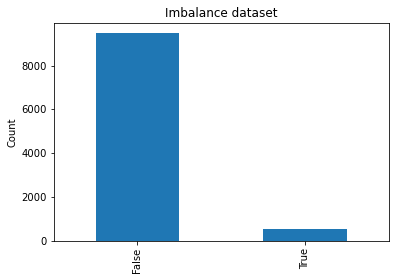

In [118]:
# Check for the imbalance dataset, By plotting Distribution

ax = df.CHURNED.value_counts().plot(kind='bar',title='Imbalance dataset')
ax.set( ylabel='Count')
plt.show()

In [119]:
# checking the NULL counts

df.isnull().sum(axis = 0)

USER_TYPE                 0
MEMBER_TYPE               0
MEMBER_LEVEL              0
BASIC_LEVEL               0
SPENDING_LIMIT            0
NUM_ORDERS                0
NUM_ITEMS                 0
TOTAL_SPEND               0
FIRST_ORDER_DATE          0
MOST_RECENT_ORDER_DATE    0
NUM_OFFERS_USED           0
NUM_FAILED_ORDERS         0
CHURNED                   0
dtype: int64

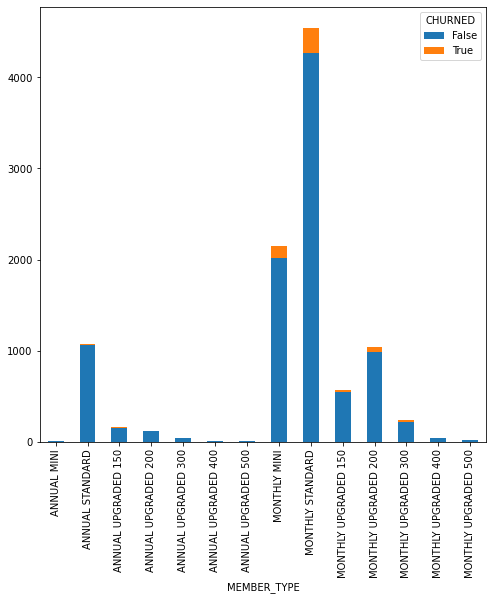

In [120]:
# Chart to check the Categorical Variable Member Type, How it os dependant or responsible for Customer's CHURN

clarity_color_table = pd.crosstab(index=df["MEMBER_TYPE"], 
                          columns=df["CHURNED"])


clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

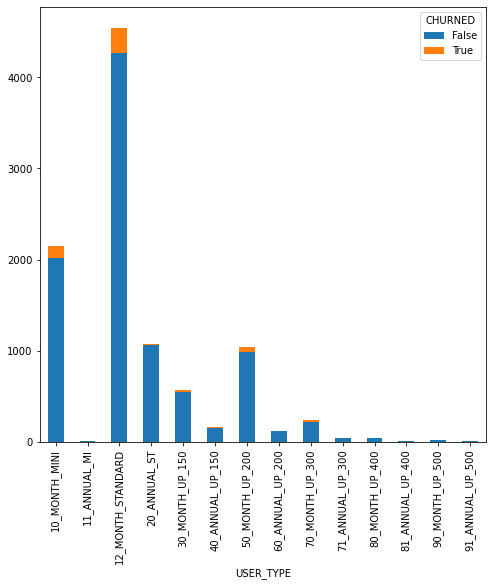

In [121]:
# Chcikng the dependancy check for another categorical variable USER_TYPE

clarity_color_table = pd.crosstab(index=df["USER_TYPE"], 
                          columns=df["CHURNED"])


clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

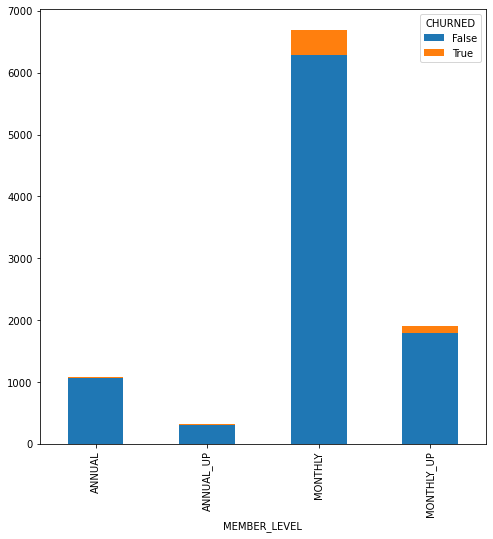

In [122]:
clarity_color_table = pd.crosstab(index=df["MEMBER_LEVEL"], 
                          columns=df["CHURNED"])


clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

In [123]:
# Converting date features to datetime format of pandas

df['FIRST_ORDER_DATE'] = pd.to_datetime(df['FIRST_ORDER_DATE'])
df['MOST_RECENT_ORDER_DATE'] = pd.to_datetime(df['MOST_RECENT_ORDER_DATE'])

In [124]:
# Calculating the recency of the dataset based on RFM(Recency Frequncy and Monetory Model)

df['RECENCY']= df['MOST_RECENT_ORDER_DATE'] - df['FIRST_ORDER_DATE']

In [125]:
# Converting Days to Integer

df['RECENCY'] = df['RECENCY'].dt.days

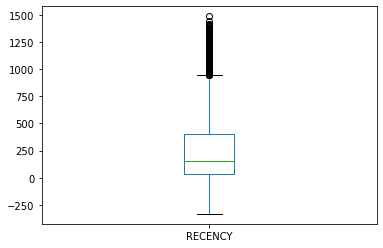

In [126]:
# There is some issue in the data entry as we can see that there are some values which are negative

# meaning, there are some records for which recent order date is older than first order date
# which is impossible

df['RECENCY'].plot(kind='box')

In [127]:
# There are 908 records where this issue is there

len(df['RECENCY'][df['RECENCY']<0])

908

In [128]:
# Converting categorical features to Enconding format

from sklearn.preprocessing import LabelEncoder

for i in df.columns[:4].values:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i])


2.5435
7.2165
1.9414
1.1148


In [129]:
df.head()

,USER_TYPE,MEMBER_TYPE,MEMBER_LEVEL,BASIC_LEVEL,SPENDING_LIMIT,NUM_ORDERS,NUM_ITEMS,TOTAL_SPEND,FIRST_ORDER_DATE,MOST_RECENT_ORDER_DATE,NUM_OFFERS_USED,NUM_FAILED_ORDERS,CHURNED,RECENCY
0,3,1,0,0,100,19,77,794.06,2019-02-18 04:31:00,2020-09-24 00:09:00,69,0,False,583
1,4,9,3,2,150,28,56,555.09,2019-04-27 20:40:00,2020-09-13 14:54:00,56,2,False,504
2,0,7,2,1,50,8,16,127.73,2020-02-06 18:12:00,2020-04-10 08:16:00,16,0,False,63
3,2,8,2,1,100,34,81,534.55,2019-03-27 13:29:00,2020-09-29 23:34:00,80,0,False,552
4,2,8,2,1,100,6,11,105.80,2020-02-05 15:19:00,2020-02-10 17:16:00,11,0,False,5


In [130]:
df.columns

Index(['USER_TYPE', 'MEMBER_TYPE', 'MEMBER_LEVEL', 'BASIC_LEVEL',
       'SPENDING_LIMIT', 'NUM_ORDERS', 'NUM_ITEMS', 'TOTAL_SPEND',
       'FIRST_ORDER_DATE', 'MOST_RECENT_ORDER_DATE', 'NUM_OFFERS_USED',
       'NUM_FAILED_ORDERS', 'CHURNED', 'RECENCY'],
      dtype='object')

In [133]:
le = LabelEncoder()
le.fit(df.CHURNED)

df['CHURNED'] = le.transform(df.CHURNED)

In [134]:
df['CHURNED'].value_counts()

0    9470
1     530
Name: CHURNED, dtype: int64

In [135]:
# Spliting the dataset into train and test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['USER_TYPE', 'MEMBER_TYPE', 'MEMBER_LEVEL', 'BASIC_LEVEL',
                                                        'SPENDING_LIMIT', 'NUM_ORDERS', 'NUM_ITEMS', 'TOTAL_SPEND',
                                                       'NUM_OFFERS_USED','NUM_FAILED_ORDERS','RECENCY']], df.CHURNED, test_size=0.33, random_state=42)

In [136]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

y_pred = rf.fit(X_train,y_train).predict(X_test)

In [138]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3116
           1       0.25      0.02      0.03       184

    accuracy                           0.94      3300
   macro avg       0.60      0.51      0.50      3300
weighted avg       0.91      0.94      0.92      3300



In [139]:
print(accuracy_score(y_test,y_pred))

0.9424242424242424


In [140]:
print(confusion_matrix(y_test,y_pred))

[[3107    9]
 [ 181    3]]


In [145]:
class_count_0, class_count_1 = df['CHURNED'].value_counts()


In [146]:
# Separate class
class_0 = df[df['CHURNED'] == 0]
class_1 = df[df['CHURNED'] == 1]

total class of 1 and0: 1    530
0    530
Name: CHURNED, dtype: int64


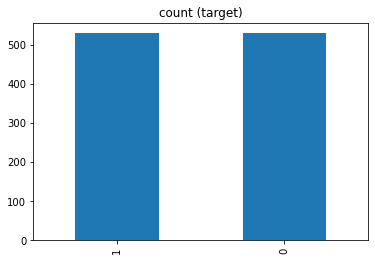

In [148]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['CHURNED'].value_counts())# plot the count after under-sampeling
test_under['CHURNED'].value_counts().plot(kind='bar', title='count (target)')

In [149]:
test_under

,USER_TYPE,MEMBER_TYPE,MEMBER_LEVEL,BASIC_LEVEL,SPENDING_LIMIT,NUM_ORDERS,NUM_ITEMS,TOTAL_SPEND,FIRST_ORDER_DATE,MOST_RECENT_ORDER_DATE,NUM_OFFERS_USED,NUM_FAILED_ORDERS,CHURNED,RECENCY
2050,0,7,2,1,50,30,57,340.30,2018-10-10 10:54:00,2020-09-19 22:59:00,53,0,0,710
2799,2,8,2,1,100,3,8,71.56,2020-03-08 19:17:00,2020-04-10 04:39:00,8,0,0,32
7974,2,8,2,1,100,7,16,128.18,2020-11-04 13:25:00,2020-11-09 15:06:00,15,0,0,5
462,6,10,3,2,200,17,59,772.00,2020-03-19 14:51:00,2020-05-10 10:50:00,59,6,0,51
6823,2,8,2,1,100,51,118,1072.47,2017-08-27 11:07:00,2020-09-29 20:02:00,116,0,0,1129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,4,9,3,2,150,7,21,236.39,2020-05-23 10:31:00,2020-11-09 20:34:00,21,0,1,170
9933,0,7,2,1,50,2,4,31.92,2020-05-08 19:18:00,2020-05-09 19:48:00,4,0,1,1
9960,6,10,3,2,200,2,2,40.00,2020-07-31 09:13:00,2020-08-31 09:30:00,2,0,1,31
9961,6,10,3,2,200,15,38,490.68,2020-05-03 13:10:00,2020-09-09 10:26:00,38,0,1,128


In [150]:
X_train, X_test, y_train, y_test = train_test_split(test_under[['USER_TYPE', 'MEMBER_TYPE', 'MEMBER_LEVEL', 'BASIC_LEVEL',
                                                        'SPENDING_LIMIT', 'NUM_ORDERS', 'NUM_ITEMS', 'TOTAL_SPEND',
                                                       'NUM_OFFERS_USED','NUM_FAILED_ORDERS','RECENCY']], test_under.CHURNED, test_size=0.33, random_state=42)

In [151]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

y_pred = rf.fit(X_train,y_train).predict(X_test)

In [153]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.61       186
           1       0.58      0.70      0.63       164

    accuracy                           0.62       350
   macro avg       0.63      0.62      0.62       350
weighted avg       0.63      0.62      0.62       350



In [154]:
print(confusion_matrix(y_test,y_pred))

[[103  83]
 [ 50 114]]


In [157]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)

Accuracy score is: 0.6171428571428571


In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.55      0.61       186
           1       0.58      0.70      0.63       164

    accuracy                           0.62       350
   macro avg       0.63      0.62      0.62       350
weighted avg       0.63      0.62      0.62       350



In [160]:
confusion_matrix(y_test,y_pred)

array([[103,  83],
       [ 50, 114]], dtype=int64)